# Exploratory Data Analysis

## Import data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from neuralNetwork import NeuralNetwork

In [2]:
%run utils.py

In [3]:
data = np.loadtxt('mlp_train.txt')
df = pd.DataFrame(data).rename(columns={0:'x1',1:'x2',2:'y'})
df.head()

,x1,x2,y
0,0.459861,-2.196528,-0.991458
1,-0.740200,0.780350,0.333378
2,0.555866,-0.750616,-0.743051
3,0.747876,0.184974,2.320633
4,-1.028215,0.780350,1.244204


## Analyzing Data

In [4]:
df.describe()

,x1,x2,y
count,1771.000000,1771.000000,1771.000000
mean,0.000084,-0.008521,0.001141
std,0.994831,1.006813,1.011010
min,-2.132271,-2.366636,-0.991458
25%,-0.788203,-0.665562,-0.743051
50%,0.171846,0.184974,-0.411842
75%,0.795878,0.780350,0.581785
max,1.515915,1.545833,3.811075


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1771 entries, 0 to 1770
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1771 non-null   float64
 1   x2      1771 non-null   float64
 2   y       1771 non-null   float64
dtypes: float64(3)
memory usage: 41.6 KB


## Plotting data

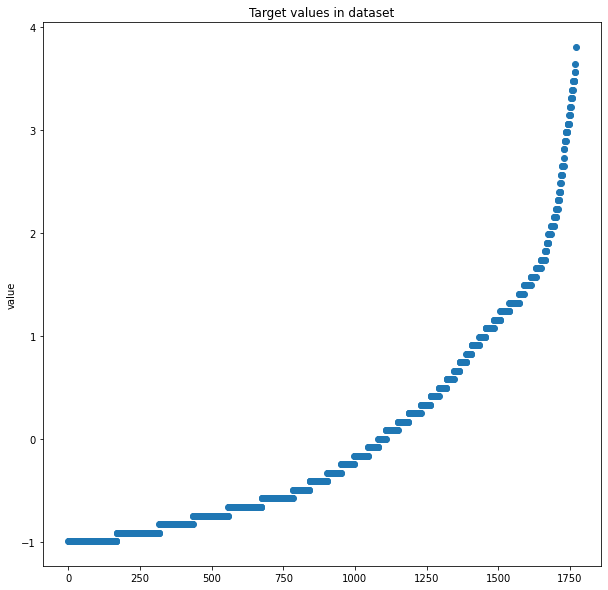

In [6]:
plt.figure(figsize=(10,10))
plt.title('Target values in dataset')
plt.ylabel('value')
plt.scatter(df.index,df['y'].sort_values())
plt.show()

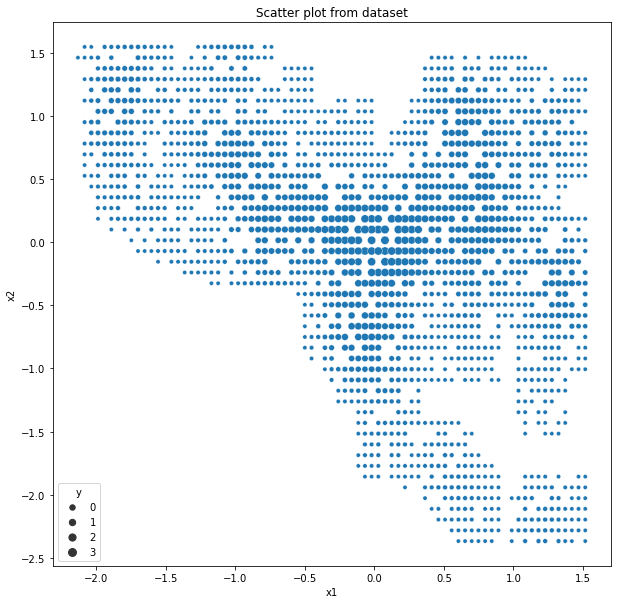

In [7]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_title('Scatter plot from dataset')
sns.scatterplot(data=df,x='x1',y='x2',size='y',ax=ax)
plt.show()

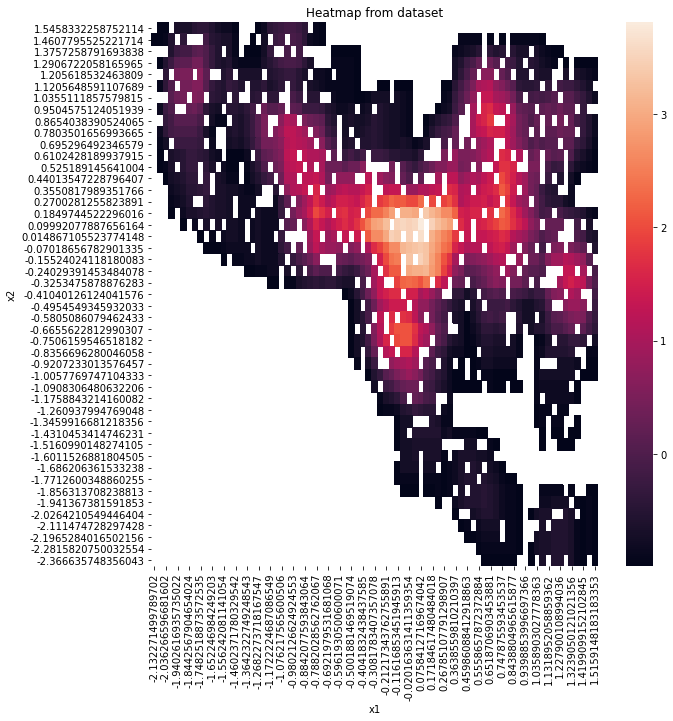

In [8]:
fig,ax = plt.subplots(figsize=(10,10))
df_hm = df.pivot('x2','x1','y')
df_hm = df_hm.sort_index(axis=0,ascending=False)
ax.set_title('Heatmap from dataset')
sns.heatmap(df_hm,ax=ax)
plt.show()

# Creating model

## loading data

In [4]:
train, test = train_test_split(data,test_ratio=0.1)
X_train, y_train = train[:,:2],train[:,2]
X_test, y_test = test[:,:2],test[:,2]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1417, 2)
(1417,)
(354, 2)
(354,)


## trying differente activations

### Sigmoid

In [61]:
model = NeuralNetwork(num_perceptrons=[2,48,1],activation='sigmoid')

In [62]:
train_error, test_error = model.fit(X_train,y_train,X_test,y_test,500,alpha=0.03)

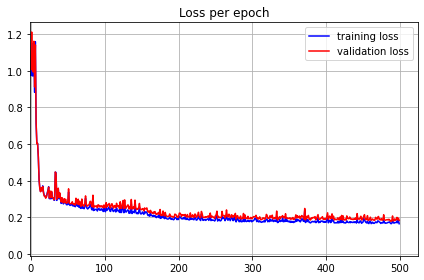

In [63]:
show_history({'loss':train_error,'val_loss':test_error})

In [64]:
test_error[-1]

0.18345162691537684

### ReLU

In [68]:
model = NeuralNetwork(num_perceptrons=[2,48,1],activation='relu')

In [69]:
train_error, test_error = model.fit(X_train,y_train,X_test,y_test,500,alpha=0.03)

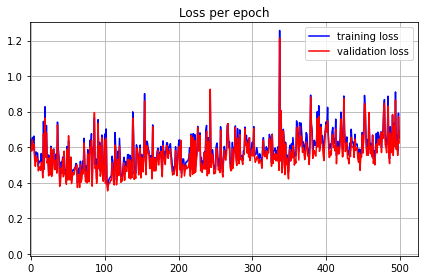

In [70]:
show_history({'loss':train_error,'val_loss':test_error})

In [71]:
test_error[-1]

0.6244206535641821

### Tanh

In [72]:
model = NeuralNetwork(num_perceptrons=[2,48,1],activation='tanh')

In [73]:
train_error, test_error = model.fit(X_train,y_train,X_test,y_test,500,alpha=0.03)

c:\Users\rudol\Desktop\UI projekt\neuralNetwork.py:48: RuntimeWarning: overflow encountered in double_scalars
  return 1-x**2


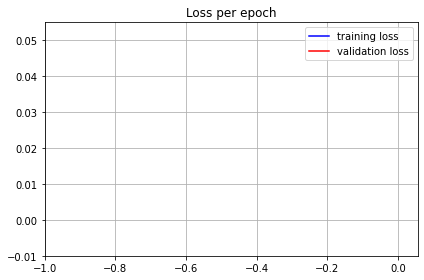

In [74]:
show_history({'loss':train_error,'val_loss':test_error})

## Learning rate

In [75]:
error = []
lr_list = [0.005,0.01,0.02,0.03,0.04,0.05]
for lr in lr_list:
    model = NeuralNetwork(num_perceptrons=[2,48,1],activation='sigmoid')
    train_err,test_err = model.fit(X_train,y_train,X_test,y_test,num_epochs=300,alpha=lr)
    error.append(test_err[-1])

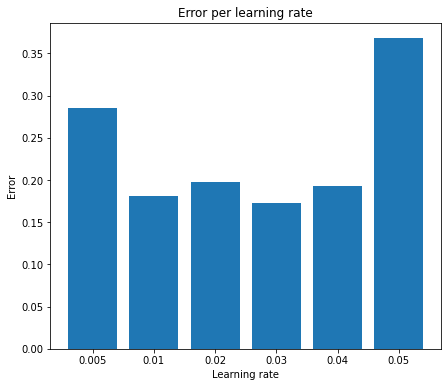

In [76]:
fig,ax = plt.subplots(figsize=(7,6))
ax.bar(list(map(str,lr_list)),error)
ax.set_title('Error per learning rate')
ax.set_xlabel('Learning rate')
ax.set_ylabel('Error')
plt.show()

In [77]:
min(error)

0.17305908721212154

### Pocet neuronov na skrytej vrstve

In [51]:
error = []
for i in range(41):
    model = NeuralNetwork(num_perceptrons=[2,10+i,1],activation='sigmoid')
    train_err,test_err = model.fit(X_train,y_train,X_test,y_test,num_epochs=300,alpha=0.03)
    error.append(test_err[-1])

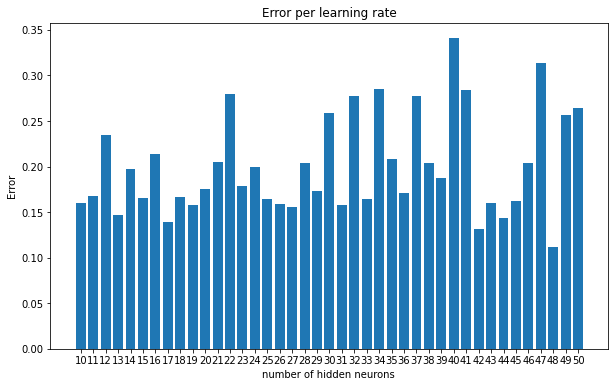

In [53]:
fig,ax = plt.subplots(figsize=(10,6))
ax.bar(list(map(str,[10+i for i in range(41)])),error)
ax.set_title('Error per learning rate')
ax.set_xlabel('number of hidden neurons ')
ax.set_ylabel('Error')
plt.show()

In [54]:
min(error)

0.11226980035634837

## K-fold crossvalidation

In [23]:
model = NeuralNetwork(num_perceptrons=[2,48,1],activation='sigmoid')

In [24]:
train_err,test_err = k_fold(model,X_train,y_train.reshape(1,y_train.shape[0]),k=8)

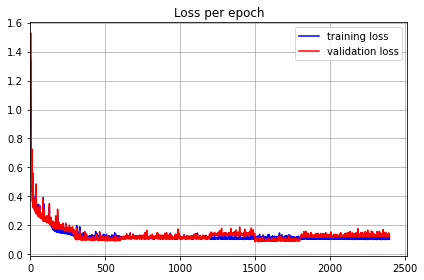

In [25]:
show_history({'loss':train_err,'val_loss':test_err})

In [31]:
predicted = model.predict(data[:,:2])
model.calculate_error(predicted=predicted,real=data[:,2])

0.1070437735363903

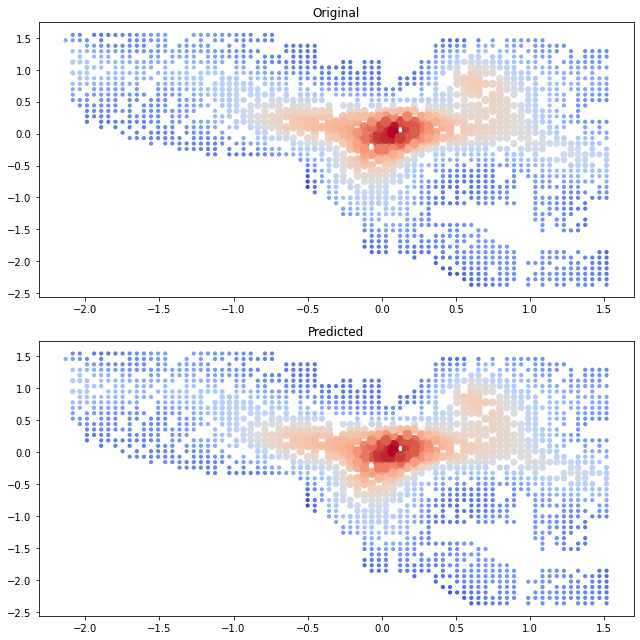

In [30]:
predicted = model.predict(data[:,:2])
show_data(data[:,:2],data[:,2],predicted)